In [6]:
!pip install tensorflow
from tensorflow import keras

  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=d3dabd6eff38c404b1c8c2e83efe03e0896d5e3fe0080ae6a4135aa9d8f6abef
  Stored in directory: c:\users\wangj\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=9c5a86b5f7b0a28ae96311e65e6a341f78dba2d405499faeb72cff928a9f01bc
  Stored in directory: c:\users\wangj\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [7]:
from tensorflow import keras

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [9]:
train_X.shape

(60000, 28, 28)

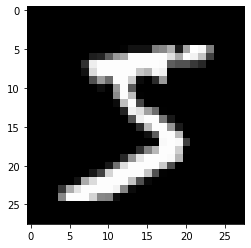

In [10]:
plt.imshow(train_X[0], cmap="gray")

In [11]:
np.max(train_X)

255

In [12]:
train_X = train_X/255
test_X = test_X/255

In [13]:
test_X[0].shape

(28, 28)

In [14]:
# X will temp store flattened matrices
X = []
for x in train_X:
  X.append(x.flatten().reshape(784, 1))

# Y will temp store one-hot encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# Our data will be stored as a list of tuples. 
train_data = [p for p in zip(X, Y)]

In [15]:
p = train_data[0]
print(p[1])
print(train_y[0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
5


In [16]:
X = []
for x in test_X:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

In [17]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))

def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

In [18]:
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

In [19]:
W, B = initialize_weights()


In [20]:
x, y = train_data[0]

In [21]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)


In [22]:
a1.shape

(60, 1)

In [23]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


In [24]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


In [25]:
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

In [26]:
A[-1].shape

(10, 1)

In [27]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [28]:
deltas[L-1]

array([[ 0.06608722],
       [ 0.08525282],
       [ 0.07706457],
       [ 0.14795019],
       [ 0.08643599],
       [-0.02121171],
       [ 0.06458382],
       [ 0.14374004],
       [ 0.13347603],
       [ 0.14599358]])

In [29]:
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

In [30]:
deltas[1].shape


(60, 1)

In [31]:
alpha = 0.04


In [32]:
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

In [33]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas


In [34]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)


In [35]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.2382921916322547


Predicted Value = 4
Actual Value = 0


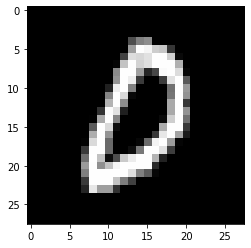

In [36]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [38]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")



In [39]:
stochastic_gradient_descent (W,B, train_data)

Initial Cost = 1.2382921916322547
0 Cost = 0.07324082118165533
1 Cost = 0.053730882993266865
2 Cost = 0.0432860790516251


Predicted Value = 7
Actual Value = 7


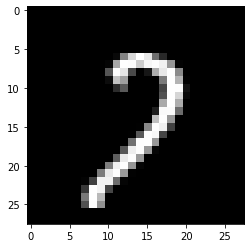

In [40]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

Predicted Value = 7
Actual Value = 7


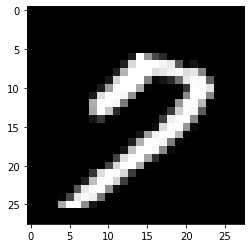

In [41]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

Predicted Value = 2
Actual Value = 2


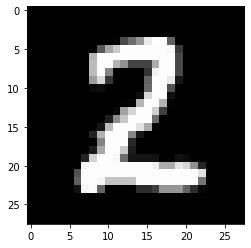

In [42]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [50]:

class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")



  def mini_batch_gradient_descent(self, data,batch_size =15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
        for j in range (0,data_length-batch_size, batch_size):
            delta_list = []
            A_list = []
            for p in data[j:j+batch_size]:
                A, deltas = self.deltas_dict(p)
                delta_list.append (deltas)
                A_list.append (A)
            
            for i in range(1, self.L):
              self.W[i] = self.W[i] - (alpha/batch_size)*sum (da[0][i]@da[1][i-1].T for da in zip (delta_list, A_list))
              self.B[i] = self.B[i] - (alpha/batch_size)* sum (deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

In [51]:
net = MultilayerPerceptron(layers=[784, 100, 100, 10])


In [52]:
net.stochastic_gradient_descent(train_data)


Initial Cost = 1.1215663320600457
2 Cost = 0.04315625679612553


In [53]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.04315625679612553
2 Cost = 0.037665227359556484


Predicted Value = 8
Actual Value = 8


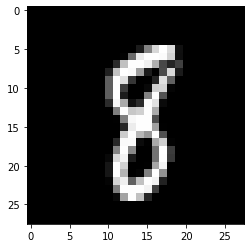

In [54]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()


Predicted Value = 0
Actual Value = 0


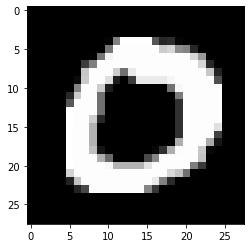

In [47]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

Predicted Value = 1
Actual Value = 1


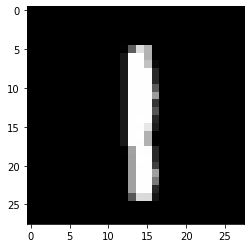

In [48]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

Predicted Value = 1
Actual Value = 1


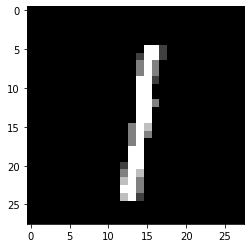

In [49]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()
